In [1]:
target = 'http://books.google.co.uk/books?id=spcAAAAAMAAJ&pg=PA72&output=embed'
width=700
height=500
from IPython.display import IFrame
IFrame(target, width=width, height=height)

In [11]:
#Liner Algebra
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/MLAI/master/Labs/datasets/olympic_marathon_men.csv', header = None, encoding= 'unicode_escape')
#reshape() function: -1 means that u need to caculate the row or column numbers
#reshape(-1,1):turn to one column
#reshape(1,-1):turn to one row
#reshape(2,-1):turn to 2 row
x = np.array(data.iloc[:, 0].values).reshape(-1,1)
y = np.array(data.iloc[:, 1].values).reshape(-1,1)

In [13]:
print(x)
print(y)

[[1896]
 [1900]
 [1904]
 [1908]
 [1912]
 [1920]
 [1924]
 [1928]
 [1932]
 [1936]
 [1948]
 [1952]
 [1956]
 [1960]
 [1964]
 [1968]
 [1972]
 [1976]
 [1980]
 [1984]
 [1988]
 [1992]
 [1996]
 [2000]
 [2004]
 [2008]
 [2012]]
[[4.47083333]
 [4.46472926]
 [5.22208333]
 [4.15467867]
 [3.90331675]
 [3.56951267]
 [3.82454477]
 [3.62483707]
 [3.59284275]
 [3.53880792]
 [3.67010309]
 [3.39029111]
 [3.43642612]
 [3.20583007]
 [3.13275665]
 [3.32819844]
 [3.13583758]
 [3.0789588 ]
 [3.10581822]
 [3.06552909]
 [3.09357349]
 [3.16111704]
 [3.14255244]
 [3.08527867]
 [3.10265829]
 [2.99877553]
 [3.03392977]]


Text(0, 0.5, 'pace in min/km')

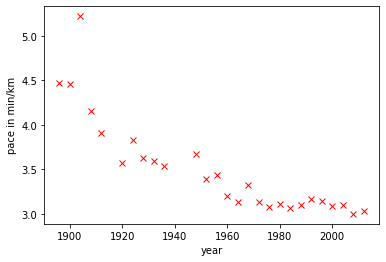

In [15]:
#Ploting the data
%matplotlib inline
import pylab as plt

plt.plot(x, y, 'rx')
plt.xlabel('year')
plt.ylabel('pace in min/km')

In [16]:
m = -0.4
c = 80

In [18]:
c = (y - m*x).mean()
print(c)

786.0197711451852


# Question1

1.**(a)`f = x.sum()`**

$f=\sum_{i=1}^n x_i$

2.**(b)`m = x.mean()`**

$f=\frac{1}{n} \sum_{i=1}^n x_i$

3.**(c)`g = (x*w).sum()`**

$f=\sum_{i=1}^n w_i x_i$


In [32]:
#Question2

#create the vector x, 1890-2020,num(x) = 130, astype(int)->x is Integer, if remove astype(int),x values are rounded towards -inf
x_test = np.linspace(1890, 2020, 130).astype(float)[:, None]

f_test = m*x_test + c
print(x_test)

[[1890.        ]
 [1891.00775194]
 [1892.01550388]
 [1893.02325581]
 [1894.03100775]
 [1895.03875969]
 [1896.04651163]
 [1897.05426357]
 [1898.0620155 ]
 [1899.06976744]
 [1900.07751938]
 [1901.08527132]
 [1902.09302326]
 [1903.10077519]
 [1904.10852713]
 [1905.11627907]
 [1906.12403101]
 [1907.13178295]
 [1908.13953488]
 [1909.14728682]
 [1910.15503876]
 [1911.1627907 ]
 [1912.17054264]
 [1913.17829457]
 [1914.18604651]
 [1915.19379845]
 [1916.20155039]
 [1917.20930233]
 [1918.21705426]
 [1919.2248062 ]
 [1920.23255814]
 [1921.24031008]
 [1922.24806202]
 [1923.25581395]
 [1924.26356589]
 [1925.27131783]
 [1926.27906977]
 [1927.28682171]
 [1928.29457364]
 [1929.30232558]
 [1930.31007752]
 [1931.31782946]
 [1932.3255814 ]
 [1933.33333333]
 [1934.34108527]
 [1935.34883721]
 [1936.35658915]
 [1937.36434109]
 [1938.37209302]
 [1939.37984496]
 [1940.3875969 ]
 [1941.39534884]
 [1942.40310078]
 [1943.41085271]
 [1944.41860465]
 [1945.42635659]
 [1946.43410853]
 [1947.44186047]
 [1948.4496124

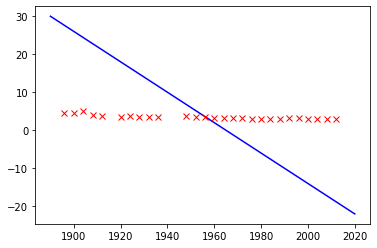

In [26]:
#plot those test predictions with a blue line on the same plot as the data, the fit shows not good
#we need to iterate between these parameter updates in a loop to improve the fit, we have to do these several times
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y,'rx')

In [31]:
for i in np.arange(10):
  m = ((y - c)*x).sum()/(x*x).sum()
  c = (y-m*x).sum()/y.shape[0]
  print(m)
  print(c)

-0.39987240729970064
785.7701620181551
-0.3997448566642155
785.5206351823653
-0.3996173480796767
785.271190610686
-0.39948988153222076
785.0218282759963
-0.3993624570079889
784.7725481511841
-0.39923507449312684
784.5233502091467
-0.39910773397378535
784.2742344227905
-0.3989804354361189
784.0252007650296
-0.398853178866287
783.776249208788
-0.3987259642504537
783.5273797269986


In [35]:
m = -0.4
c = 80
diff = 1
itr = 0
f = m * x + c
##** in python means power
obj = ((y-f)**2).sum()
while diff>1e-4:
  old_obj = obj
  m = ((y-c)*x).sum()/(x*x).sum()
  c = (y-m*x).sum()/y.shape[0]
  f = m*x + c

  if not itr % 10:
    obj = ((y - f)**2).sum()
    print("Interation", itr, "Objective:", obj)
    diff = old_obj-obj
  itr = itr + 1

Interation 0 Objective: 25.219994194797778
Interation 10 Objective: 25.06723764970137
Interation 20 Objective: 24.91548517309025
Interation 30 Objective: 24.764730165223995
Interation 40 Objective: 24.614966069742415
Interation 50 Objective: 24.466186373380275
Interation 60 Objective: 24.318384605684024
Interation 70 Objective: 24.171554338730367
Interation 80 Objective: 24.02568918684686
Interation 90 Objective: 23.8807828063338
Interation 100 Objective: 23.73682889518882
Interation 110 Objective: 23.593821192832422
Interation 120 Objective: 23.4517534798362
Interation 130 Objective: 23.31061957765168
Interation 140 Objective: 23.170413348342198
Interation 150 Objective: 23.031128694315917
Interation 160 Objective: 22.89275955805988
Interation 170 Objective: 22.755299921877533
Interation 180 Objective: 22.618743807626835
Interation 190 Objective: 22.483085276459605
Interation 200 Objective: 22.348318428564017
Interation 210 Objective: 22.2144374029077
Interation 220 Objective: 22.0814

In [36]:
print(m)
print(c)

-0.01364599028163326
30.196852873921063


In [40]:
#Mutiple Input Solution with Linear Algebra
#Design Matrix X[1,x_i]
w = np.zeros(shape=(2,1))
w[1]=m
w[m]=c
X = np.hstack((np.ones_like(x), x))
print(X)
print(w)

[[   1 1896]
 [   1 1900]
 [   1 1904]
 [   1 1908]
 [   1 1912]
 [   1 1920]
 [   1 1924]
 [   1 1928]
 [   1 1932]
 [   1 1936]
 [   1 1948]
 [   1 1952]
 [   1 1956]
 [   1 1960]
 [   1 1964]
 [   1 1968]
 [   1 1972]
 [   1 1976]
 [   1 1980]
 [   1 1984]
 [   1 1988]
 [   1 1992]
 [   1 1996]
 [   1 2000]
 [   1 2004]
 [   1 2008]
 [   1 2012]]
[[-1.36459903e-02]
 [ 3.01968529e+01]]


In [46]:
#np.dot does matrix multiplication in python
f = np.dot(X, w)

In [47]:
resid = (y-f)
E = np.dot(resid.T, resid)
print("Error funciton is:", E)

Error funciton is: [[1.97998376]]


# Objective Optimisation

In [43]:
np.linalg.solve?

In [45]:
w = np.linalg.solve(np.dot(X.T, X),np.dot(X.T, y))
w

array([[ 2.88952457e+01],
       [-1.29806477e-02]])

[-0.01298065]
[28.89524568]


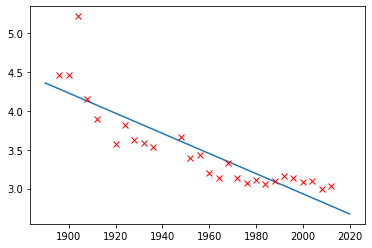

In [48]:
m = w[1]
c = w[0]
f_test = m*x_test + c
print(m)
print(c)
plt.plot(x_test, f_test)
plt.plot(x,y,'rx')

# Multivariate Linear Regression
#Movie Body Count Data

In [56]:
movies = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/MLAI/master/Labs/datasets/film-death-counts-Python.csv',encoding = 'unicode_escape')

In [57]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Film            421 non-null    object 
 1   Year            421 non-null    int64  
 2   Body_Count      421 non-null    int64  
 3   MPAA_Rating     326 non-null    object 
 4   Genre           421 non-null    object 
 5   Director        421 non-null    object 
 6   Actors          421 non-null    object 
 7   Length_Minutes  421 non-null    int64  
 8   IMDB_Rating     421 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 29.7+ KB


In [58]:
print(','.join(movies.columns))

Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating


In [71]:
#Design Matrix based on the numeric features

select_features = ['Year', 'Body_Count', 'Length_Minutes']
#diffierence between loc and iloc: iloc works on the positions in the index,loc works on labels in the index
X = movies.loc[:, select_features]
X['Eins'] = 1 # add a column for the offset
# or y = movies.loc[:, ['IMDB_Rating']]
y = movies[['IMDB_Rating']]
print(X)
print(y)
print(z)


     Year  Body_Count  Length_Minutes  Eins
0    2002           7             117     1
1    2007          45             122     1
2    2006           0             117     1
3    1999           7             123     1
4    1971          10              94     1
..    ...         ...             ...   ...
416  2007          10              93     1
417  1967          91             117     1
418  2007           3             157     1
419  2001           4              89     1
420  1964         140             138     1

[421 rows x 4 columns]
     IMDB_Rating
0            7.4
1            7.8
2            7.8
3            6.4
4            7.2
..           ...
416          6.6
417          6.9
418          7.7
419          6.6
420          7.8

[421 rows x 1 columns]
0      7.4
1      7.8
2      7.8
3      6.4
4      7.2
      ... 
416    6.6
417    6.9
418    7.7
419    6.6
420    7.8
Name: IMDB_Rating, Length: 421, dtype: float64


In [67]:
import pandas as pd
w = pd.DataFrame(data=np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)),
                 index = X.columns,
                 columns=['regression_coefficient'])
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb210fa5510>]],
      dtype=object)

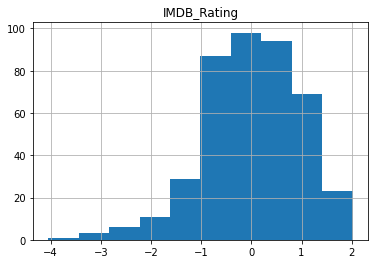

In [68]:
#check the residuals to see how good out estimates are
(y - np.dot(X, w)).hist()

As we can see that it looks like we are dominated by the bias.

In [78]:
#Solution with QR Decomposition
import scipy.linalg as linalg
Q, R = np.linalg.qr(X)
w = linalg.solve_triangular(R, np.dot(Q.T, y))
w = pd.DataFrame(w, index=X.columns)
w

,0
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


In [79]:
# Initial code: it uses pods.notebook.display_prediction, but with a minor modification to 
# allow the use of ipywidgets
from ipywidgets import *
def display_prediction(basis, num_basis=4, wlim=(-1.,1.), fig=None, ax=None, xlim=None, ylim=None, num_points=1000, offset=0.0, **kwargs):
    """Interactive widget for displaying a prediction function based on summing separate basis functions.
    :param basis: a function handle that calls the basis functions.
    :type basis: function handle.
    :param xlim: limits of the x axis to use.
    :param ylim: limits of the y axis to use.
    :param wlim: limits for the basis function weights."""

    #import numpy as np
    #import pylab as plt

    if fig is not None:
        if ax is None:
            ax = fig.gca()

    if xlim is None:
        if ax is not None:
            xlim = ax.get_xlim()
        else:
            xlim = (-2., 2.)
    if ylim is None:
        if ax is not None:
            ylim = ax.get_ylim()
        else:
            ylim = (-1., 1.)

    # initialise X and set up W arguments.
    x = np.zeros((num_points, 1))
    x[:, 0] = np.linspace(xlim[0], xlim[1], num_points)
    param_args = {}
    for i in range(num_basis):
        lim = list(wlim)
        if i ==0:
            lim[0] += offset
            lim[1] += offset
        param_args['w_' + str(i)] = tuple(lim)

    # helper function for making basis prediction.
    def predict_basis(w, basis, x, num_basis, **kwargs):
        Phi = basis(x, num_basis, **kwargs)
        f = np.dot(Phi, w)
        return f, Phi
    
    if type(basis) is dict:
        use_basis = basis[list(basis.keys())[0]]
    else:
        use_basis = basis
    f, Phi = predict_basis(np.zeros((num_basis, 1)),
                           use_basis, x, num_basis,
                           **kwargs)
    if fig is None:
        fig, ax=plt.subplots(figsize=(12,4))
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)

    predline = ax.plot(x, f, linewidth=2)[0]
    basislines = []
    for i in range(num_basis):
        basislines.append(ax.plot(x, Phi[:, i], 'r')[0])

    ax.set_ylim(ylim)
    ax.set_xlim(xlim)

    def generate_function(basis, num_basis, predline, basislines, basis_args, display_basis, offset, **kwargs):
        w = np.zeros((num_basis, 1))
        for i in range(num_basis):
            w[i] = kwargs['w_'+ str(i)]
        f, Phi = predict_basis(w, basis, x, num_basis, **basis_args)
        predline.set_xdata(x[:, 0])
        predline.set_ydata(f)
        for i in range(num_basis):
            basislines[i].set_xdata(x[:, 0])
            basislines[i].set_ydata(Phi[:, i])

        if display_basis:
            for i in range(num_basis):
                basislines[i].set_alpha(1) # make visible
        else:
            for i in range(num_basis):
                basislines[i].set_alpha(0) 
        display(fig)
    if type(basis) is not dict:
        basis = fixed(basis)

    plt.close(fig)
    interact(generate_function, 
             basis=basis,
             num_basis=fixed(num_basis),
             predline=fixed(predline),
             basislines=fixed(basislines),
             basis_args=fixed(kwargs),
             offset = fixed(offset),
             display_basis = False,
             **param_args)

In [83]:
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
  Phi = np.zeros((x.shape[0], num_basis))
  for i in range(num_basis):
    Phi[: ,i:i+1] = x**i
  return Phi

In [84]:
display_prediction(basis=polynomial, num_basis=4, ylim=[-3.,3])

interactive(children=(Checkbox(value=False, description='display_basis'), FloatSlider(value=0.0, description='…

In [86]:
#Question5 
display_prediction(basis=polynomial, num_basis=10, ylim=[-3., 3])

interactive(children=(Checkbox(value=False, description='display_basis'), FloatSlider(value=0.0, description='…

Calculated error: 3.789770914476285
Estimated error: 6.923047533761554


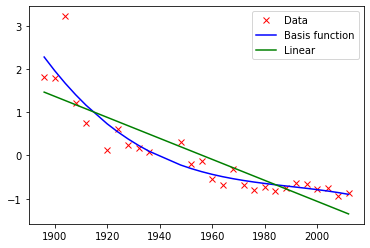

In [96]:
#Fitting to Data
data = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/MLAI/master/Labs/datasets/olympic_marathon_men.csv', header=None, encoding= 'unicode_escape')
x = np.array(data.iloc[:, 0].values).reshape(-1,1)
y = np.array(data.iloc[:, 1].values).reshape(-1,1)
y= y- y.mean()
y = y/y.std()

Phi = polynomial(x, num_basis=4, data_limits=[1896, 2012])
w = np.linalg.solve(np.dot(Phi.T,Phi), np.dot(Phi.T,y))
f = np.dot(Phi, w)

e = ((y-f)**2).sum()
print('Calculated error:', e)

X = np.hstack((np.ones_like(x), x))
w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
m = w[1]
c = w[0]
f_estimate = m*x + c

e_estimate = ((y-f_estimate)**2).sum()
print('Estimated error:', e_estimate)

#plot
plt.plot(x, y, 'rx', label="Data")
plt.plot(x, f, 'b-', label="Basis function")
plt.plot(x, f_estimate, 'g-', label="Linear")
plt.legend()
plt.show()